Notebook para el desarrollo del proyecto datascience desafio latam

### Equipo de trabajo

## Roles para el desarrollo del proyecto

● Líder del equipo                          = Jorge Guerrero / Paulo Gonzalez

● Analista de datos                         = Esteban Sanchez / Gonzalo Rojas

● Control de calidad y validación de datos  = Esteban Sanchez / Gonzalo Rojas

● Ingeniero/a de modelamiento               = Daniel Mardones / Jorge Guerrero

● Visualización de datos                    = Daniel Mardones / Jorge Guerrero

● Documentador/a                            = Daniel Mardones / Paulo Gonzalez

### Selección del tema y motivación

Se selecciona el tema propuesto Automotora, debido a que es una necesidad replicable, universal y contemporanea a cualquier epoca. Nuestra motivación es generar una herramienta de apoyo a la toma de decisiones de los equipos de compra y venta, para obtener las mejores opciones presentes en el mercado, mejorando la rentabilidad del negocio.

### Planificación de la investigación

 ## Requerimientos:
  
    # 1. Generar una herramienta que ayude al equipo de compras a encontrar las mejores oportunidades.
        Atraves de un modelo de clasificación que nos permita encontrar la mejor rentabilidad, usando técnicas de ML.

    # 2. Definir una propuesta de inversión (lista de automóviles convenientes) para la Automotora.
        Por medio de las metricas obtenidos podremos definir una propuesta para inversion, mediante vehiculos que esten por debajo del precio de venta promedio, lo cual permite un mejor margen de venta.

    # 3. Definir una estrategia de venta por gama de vehículos.
        Se incorpora una columna la cual clasifica la marca del vehiculo en generalista o premium. Con esto podremos generar un analisis del comporatamiento en la venta de vehiculos y con esto desarrollar una estrategia.

    # 4. Encontrar oportunidades de compra y venta entre ciudades/estados.
        Atraves de un EDA, podemos determinar en que ciudades / estados se encuentran las mejores oportunidades de compra y determinar las mejores ciudades / estados para vender estos vehiculos, maximizando la utilidad.

## Hipotesis

    Nuestra hipotesis es poder determinar, mediante un modelo clasificatorio si es rentable la compra de un vehiculo, de acuerdo a sus especifaciones, para una posterior venta.

## Definición del Vector Objetivo

    El vector objetivo es la variable Price.

## Estrategias analíticas a nivel descriptivo

    Se desarrollorá un EDA, el cual nos visualizara la distrubición de vehiculos de acuerdo a la marca, modelos, año, ciudad, estado, millas y valores de vehiculos.

## Modelación y predicción de trabajo

    Como primera estrategia utilizaremos la libreria Lazy Predict, utilizando su implementacion estandar, para conocer de forma preliminar los mejores clasificadores para esta solución. Para almacenar los resultados, utilizaremos una base de datos Postgres, lo que permite obtener mediante una query realizada por web, si es conveniente la compra del vehiculo.

### Disclaimer

- Los datos no seran encriptados.

- Los set de datos no contienen datos faltantes.

- Existen 3 dataset, los cuales por origen se encuentran dividos en: 
    muestra total = true_car_listings.csv
    muestra entrenamiento = true_cars_train.csv
    muestra validacion = true_cars_test.csv
    Debido a esto, no se realiza divisiones de muestra, solo de vector objetivo y matriz de atributos.

In [1]:
# Procesamiento de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msngo


# Machine Learning
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score, confusion_matrix



# Tratamiento de warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
df_eda = pd.read_csv('Apoyo Tema Propuesto - Automotora/true_car_listings.csv',sep=';')
df_eda


,Price,Year,Mileage,City,State,Vin,Make,Model,Gama
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,Premium
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,Premium
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,Premium
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,Premium
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,Premium
...,...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6,Premium
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6,Premium
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD,Premium
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90,Premium


In [3]:
df_eda['Make'].unique()

array(['Acura', 'Alfa', 'Am', 'Aston', 'Audi', 'Bentley', 'Bmw', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'Ferrari', 'Fiat',
       'Fisker', 'Ford', 'Freightliner', 'Genesis', 'Geo', 'Gmc', 'Honda',
       'Hummer', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati',
       'Maybach', 'Mazda', 'Mclaren', 'MercedesBenz', 'Mercury', 'Mini',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Ram', 'RollsRoyce', 'Saab', 'Saturn', 'Scion', 'Smart',
       'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object)

In [4]:
df_eda['City'].unique()

array(['El Paso', 'Long Island City', 'Windsor', ..., 'Winslow',
       'Bergenfield', 'Belmont'], dtype=object)

In [5]:
df_eda['State'].unique()

array([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
       ' VT', ' SD', ' IA', ' RI', ' ga', ' Oh', ' MT', ' DC', ' AK',
       ' Va', ' WY', ' Md', ' Ca', ' Ga'], dtype=object)

In [6]:
premium = ['Acura','Alfa','Aston','AM','Audi','Bentley','Bmw','Cadillac','Ferrari','Genesis','Hummer','Infiniti',
           'Jaguar','Lamborghini', 'Land', 'Lexus', 'Lincoln', 'Lotus', 'Maserati','Maybach', 'McLaren', 'MercedesBenz',
           'MINI','Porsche','RollsRoyce', 'Saab', 'Saturn', 'Scion','smart','Tesla','Volvo']
generalista = ['Buick','Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT','Fisker', 'Ford', 'Freightliner', 'Geo', 
               'GMC', 'Honda','Hyundai', 'Isuzu', 'Jeep', 'Kia', 'Mazda', 'Mercury','Mitsubishi', 'Nissan', 
               'Oldsmobile', 'Plymouth', 'Pontiac', 'Ram','Subaru', 'Suzuki',  'Toyota', 'Volkswagen']

In [7]:
df_eda.sample(40,random_state=666)

,Price,Year,Mileage,City,State,Vin,Make,Model,Gama
16166,27900,2014,50087,Baton Rouge,LA,WAUGFAFC2EN111452,Audi,A62.0T,Premium
585294,14447,2015,46247,Warsaw,IN,3MZBM1U73FM148785,Mazda,Mazda3i,Generalista
177225,39991,2015,14299,Reno,NV,1GCUKREC2FF204596,Chevrolet,Silverado,Generalista
525989,18077,2017,17711,Victorville,CA,5XXGT4L33HG128066,Kia,OptimaLX,Generalista
814571,34240,2015,43864,Baltimore,MD,JTEBU5JRXF5206862,Toyota,4Runner4x4,Generalista
73747,5881,2001,130382,Layton,UT,1G6KD54YX1U295423,Cadillac,DeVille4dr,Premium
153745,16595,2011,110069,Greenville,SC,2CNALDEC2B6351567,Chevrolet,EquinoxFWD,Generalista
847482,4388,2001,101787,Wellesley,MA,YV1RS61R812075059,Volvo,S602.4,Premium
125628,12490,2011,92990,Cary,NC,1GNKRGEDXBJ373229,Chevrolet,TraverseFWD,Generalista
292572,16499,2011,60748,Middlebury,CT,1FMJU1G56BEF51244,Ford,Expedition4WD,Generalista


In [8]:
df_train = pd.read_csv('Apoyo Tema Propuesto - Automotora/true_cars_train.csv',sep=';' )
df_train

,Price,Year,Mileage,City,State,Vin,Model,Make,Gama
0,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,ILX5-Speed,Acura,Premium
1,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,ILX5-Speed,Acura,Premium
2,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,ILXAutomatic,Acura,Premium
3,7989,2012,105246,Miami,FL,JH4CU2F83CC019895,TSXAutomatic,Acura,Premium
4,13995,2013,32384,West Jordan,UT,JH4CU2F64DC006203,TSX5-Speed,Acura,Premium
...,...,...,...,...,...,...,...,...,...
639140,54995,2017,2474,Berwyn,PA,YV1A22MK1H1010445,S90T6,Volvo,Premium
639141,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,XC90T6,Volvo,Premium
639142,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,XC90AWD,Volvo,Premium
639143,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,V90,Volvo,Premium


In [9]:
df_test = pd.read_csv('Apoyo Tema Propuesto - Automotora/true_cars_test.csv',sep=';' )
df_test

,Price,Year,Mileage,City,State,Vin,Model,Make,Gama
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,ILX6-Speed,Acura,Premium
1,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,ILX6-Speed,Acura,Premium
2,14490,2014,34032,Greatneck,NY,JH4CU2F84EC002686,TSXSpecial,Acura,Premium
3,12921,2012,58550,Boise,ID,JH4CU2F44CC003220,TSXAutomatic,Acura,Premium
4,14995,2014,23454,Hackettstown,NJ,19VDE1F31EE009243,ILX5-Speed,Acura,Premium
...,...,...,...,...,...,...,...,...,...
212972,59175,2017,1322,Englewood,NJ,YV1A22MKXH1010413,S90T6,Volvo,Premium
212973,54995,2017,9631,Berwyn,PA,YV1A22MK2H1013239,S90T6,Volvo,Premium
212974,61990,2017,2201,Winston Salem,NC,YV1A22ML0H1006850,S90T6,Volvo,Premium
212975,46500,2017,8,San Leandro,CA,YV140MEM3H1370217,V60T5,Volvo,Premium


In [10]:
#Información de DF exploratorio
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
 8   Gama     852122 non-null  object
dtypes: int64(3), object(6)
memory usage: 58.5+ MB


<AxesSubplot:>

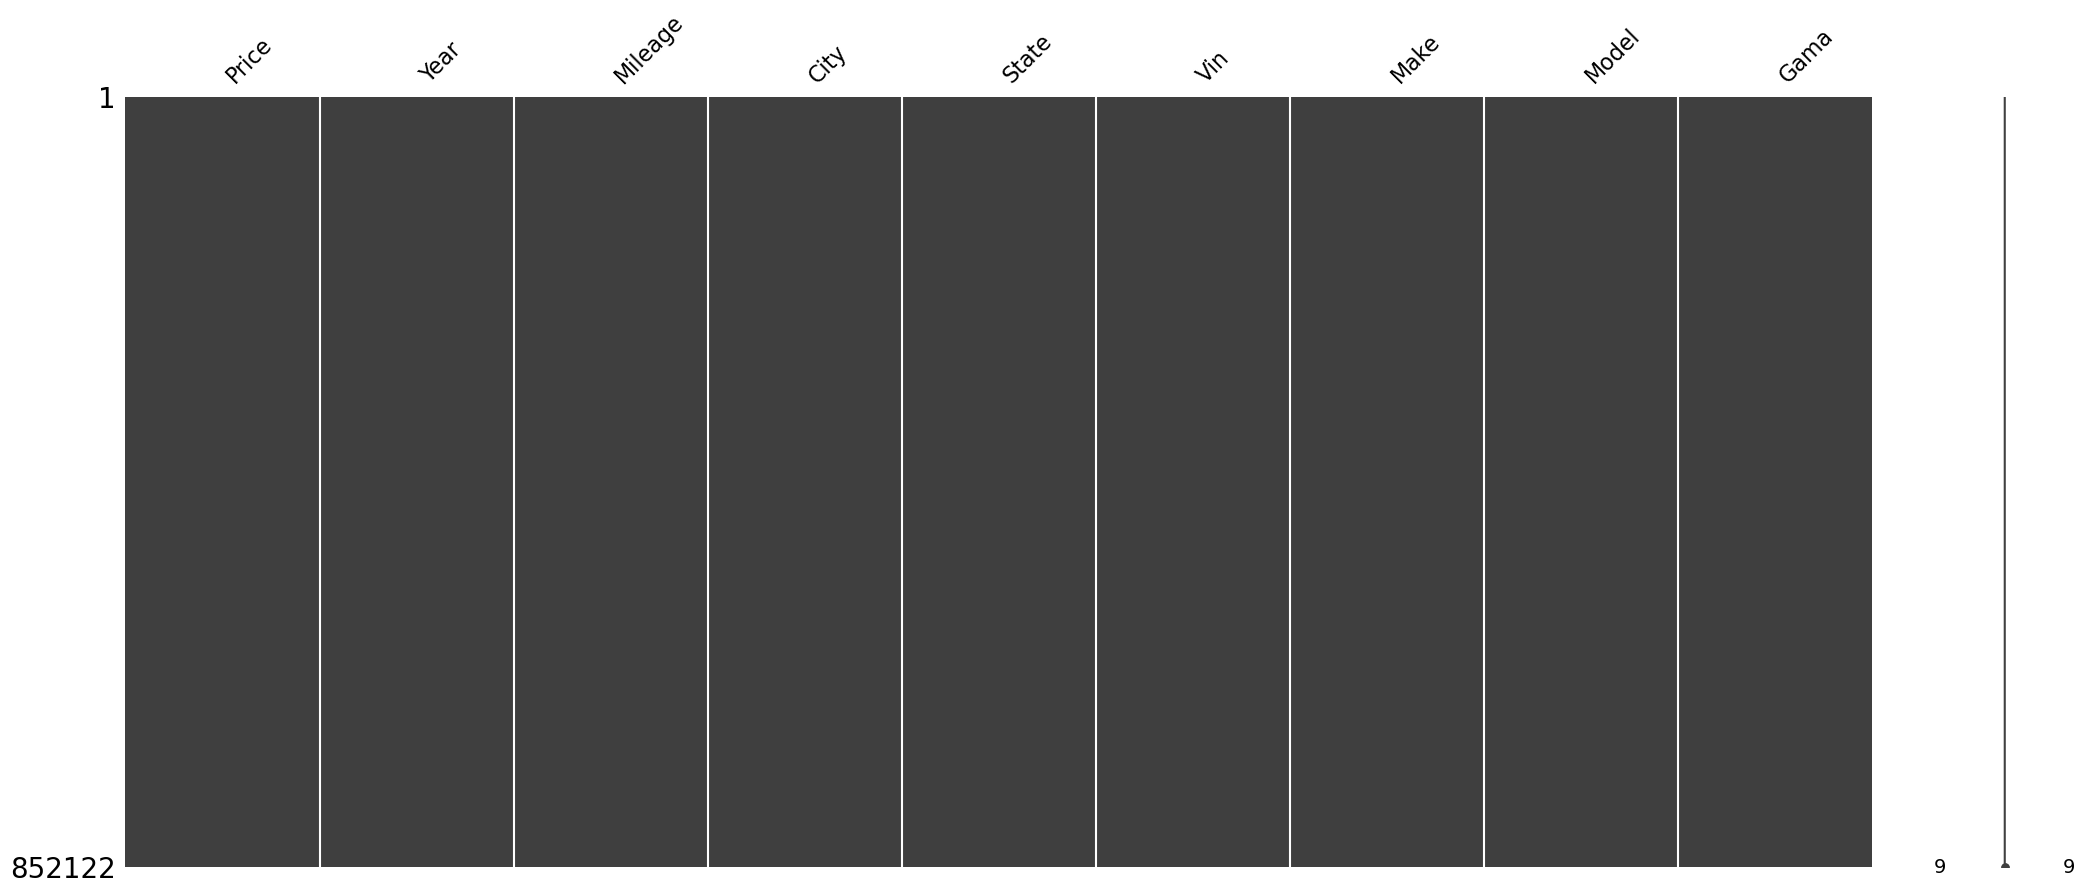

In [11]:
# Visualización de valores nulos
msngo.matrix(df_eda)

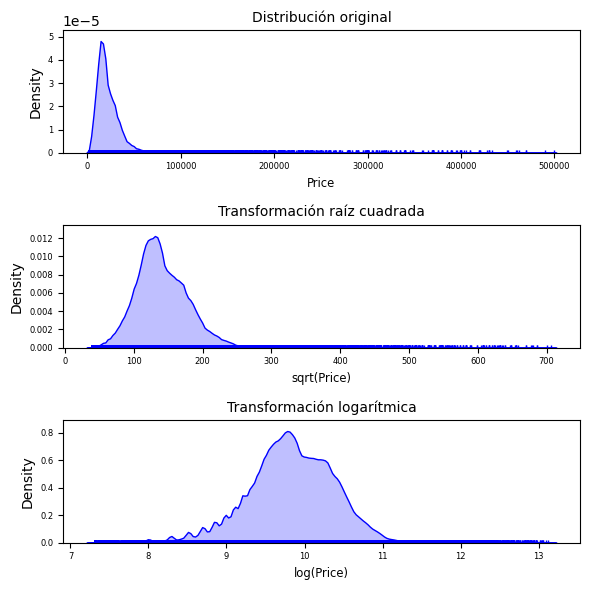

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    df_eda.Price,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Price', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df_eda.Price),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Price)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df_eda.Price),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(Price)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

<AxesSubplot:xlabel='Make', ylabel='Price'>

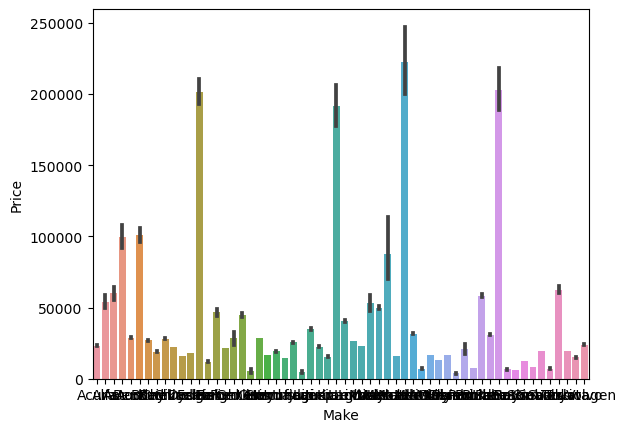

In [24]:
sns.barplot(data=df_eda, x="Make", y="Price")


In [29]:
sns.set(rc = {'figure.figsize':(20,12)})

<AxesSubplot:xlabel='Price', ylabel='Make'>

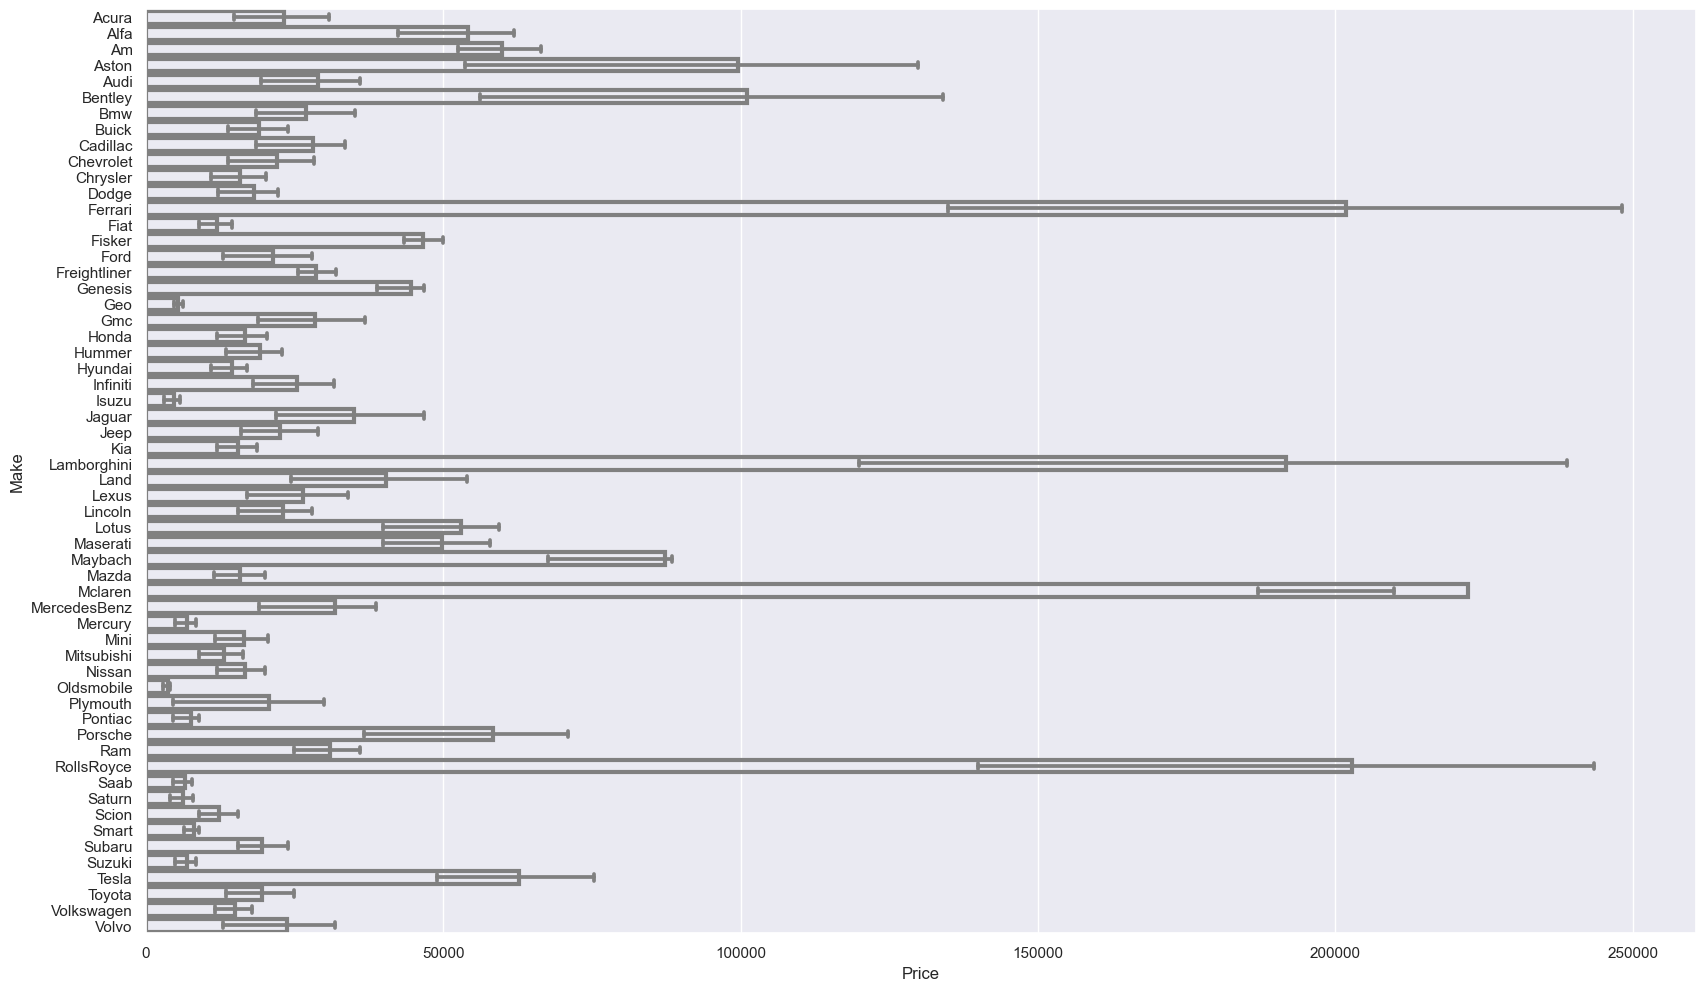

In [30]:

sns.barplot(
    data=df_eda, x="Price", y="Make",
    errorbar=("pi", 50), capsize=.4, errcolor=".5",
    linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
)

In [13]:
df_test['Price']

0          8995
1          8995
2         14490
3         12921
4         14995
          ...  
212972    59175
212973    54995
212974    61990
212975    46500
212976    63215
Name: Price, Length: 212977, dtype: int64

In [14]:
df_X_train_model = df_train
# Preprocesamiento de variables parta graficos
df_X_train_model['City'] = LabelEncoder().fit_transform(df_X_train_model['City'])
df_X_train_model['State'] = LabelEncoder().fit_transform(df_X_train_model['State'])
df_X_train_model['Make'] = LabelEncoder().fit_transform(df_X_train_model['Make'])
df_X_train_model['Model'] = LabelEncoder().fit_transform(df_X_train_model['Model'])
df_X_train_model['Gama'] = LabelEncoder().fit_transform(df_X_train_model['Gama'])

df_X_train_model.sample(5,random_state = 666)

,Price,Year,Mileage,City,State,Vin,Model,Make,Gama
442685,22352,2017,18,1552,49,JM1BN1V74H1119097,1437,34,0
639090,35995,2015,39854,174,44,YV4902RG8F2587612,2451,56,1
369434,24499,2015,25922,2159,39,1C4PJMCS2FW564013,565,25,0
584292,10977,2012,76922,724,26,4T1BF1FK1CU044281,480,54,0
382542,38999,2017,3677,1701,20,1C4RJFBG9HC603587,1105,25,0


In [15]:
df_y_test_model = df_test
df_y_test_model['City'] = LabelEncoder().fit_transform(df_y_test_model['City'])
df_y_test_model['State'] = LabelEncoder().fit_transform(df_y_test_model['State'])
df_y_test_model['Make'] = LabelEncoder().fit_transform(df_y_test_model['Make'])
df_y_test_model['Model'] = LabelEncoder().fit_transform(df_y_test_model['Model'])
df_y_test_model['Gama'] = LabelEncoder().fit_transform(df_y_test_model['Gama'])

df_y_test_model.sample(5,random_state = 666)

,Price,Year,Mileage,City,State,Vin,Model,Make,Gama
136963,7500,2011,103951,2480,32,KNDJT2A15B7322013,1873,27,0
200471,29499,2015,38356,478,5,3TMJU4GN9FM189707,1941,55,0
76818,7495,2004,187376,1275,46,1FTPX14524NA65866,766,15,0
34567,25624,2014,29711,471,49,1GCRCREH0EZ284086,1843,9,0
65872,6599,2010,108049,368,6,1FAHP3FN0AW133803,835,15,0


In [16]:
X_train_model = df_X_train_model.drop(columns = ['Price','Vin'])
X_test_model = df_test.drop(columns = ['Price','Vin'])


In [17]:
y_train_model = df_X_train_model['Price']
y_test_model = df_y_test_model['Price']

In [18]:
clf_dt = DecisionTreeRegressor().fit(X_train_model, y_train_model)

In [19]:
y_hat_dt = clf_dt.predict(X_test_model)
print(f'''Reporte para DecisionTreeRegressor
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DecisionTreeRegressor
RMSE: 18773.13528406992
MAE: 5360.0
R2 Score: -0.8887147421783612


In [20]:
clf_lr = LinearRegression().fit(X_train_model, y_train_model)

In [21]:
y_hat_lr = clf_lr.predict(X_test_model)
print(f'''Reporte para DLinearRegression
RMSE: {np.sqrt(mean_squared_error(y_test_model, y_hat_dt))}
MAE: {median_absolute_error(y_test_model, y_hat_dt)}
R2 Score: {r2_score(y_test_model, y_hat_dt)}''')

Reporte para DLinearRegression
RMSE: 18773.13528406992
MAE: 5360.0
R2 Score: -0.8887147421783612
